# Домашнее задание по ДОЭФ

Нежурина Екатерина Владиславовна

БЭК 217

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from gekko import GEKKO

In [2]:
a1 = 15
a2 = 6
a3 = 8

b1 = 6
b2 = 12
b3 = 1

c1 = 3
c2 = 13
c3 = 1

# Задача 1

Численно найдите экстремум функционала

$$ V(y) = \int\limits_0^2 ({{y'}^2+b_{1}y^2+c_{1}y'e^{4t})dt}, y(0)=-b_{2}, y(2)=b_{1}$$


Задаем дискретную шкалу времени и шаг

In [3]:
num_of_fractions = 41   
t = np.linspace(0, 2, num_of_fractions)  
dt = t[1] - t[0] 

Определим оптимизируемый функционал

In [4]:
def f(y):
    return np.sum(((y[1:] - y[:-1]) / dt) ** 2 + b1 * y[1:] ** 2 + c1 * ((y[1:] - y[:-1]) / dt) * np.exp(4 * t[1:]))

Определим стартовые значения

In [5]:
y0 = [0.5 for x in range(0, num_of_fractions)] 
bounds = [(None, None) for x in range(0, num_of_fractions)]
bounds[0], bounds[-1] = (-b2 - 10e-6, -b2 + 10e-6), (b1 - 10e-6, b1 + 10e-6)

Считаем результат и рисуем график

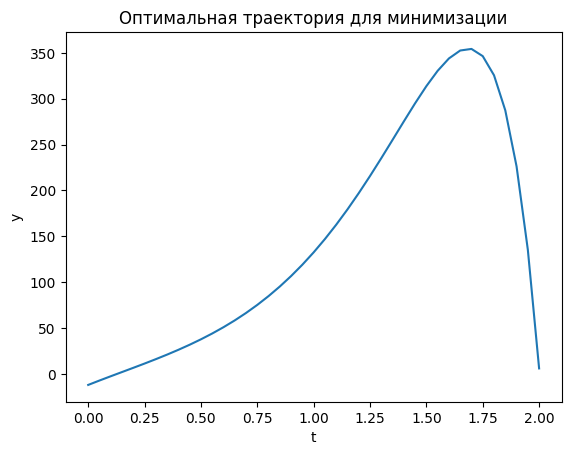

In [6]:
result_min = minimize(f, y0, method = 'l-bfgs-b', bounds = bounds)

plt.plot(t, result_min.x)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Оптимальная траектория для минимизации')
plt.show();

Численное решение задачи

In [7]:
result_min.fun

-22704624.78974364

Убедимся, что верно нашли экстремаль, для этого попробуем максимизировать исходный функционал путём минимизации отрицательного значения заданной дискретной суммы.

In [8]:
def f_max(y):
    return np.sum(-((y[1:] - y[:-1]) / dt) ** 2 - b1 * y[1:] ** 2 - c1 * ((y[1:] - y[:-1]) / dt) * np.exp(4 * t[1:]))

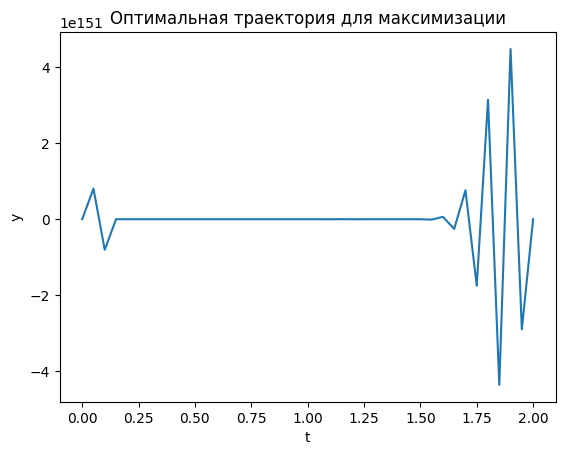

In [9]:
result_max = minimize(f_max, y0, method = 'l-bfgs-b', bounds = bounds)

plt.plot(t, result_max.x)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Оптимальная траектория для максимизации')
plt.show();

На графике видно, что не выполняются условия Коши исходной задачи, функция не гладкое, очевидно - найденный нами минимум является единственным численным решением задачи поиска экстремума.

# Задача 2

Численно найдите экстремум функционала

$$V[y] = \int\limits_0^3 {(b_{1}y - b_{2}u^2)dt}$$ 
$$y(0) = a_{1}, y(3) - свободно, y' = a_{3}y + u, u\in {[-c_{1}, c_{2}]}$$

Инициализируем модель 

In [10]:
m = GEKKO(remote = False)
nt = 101
m.time = np.linspace(0, 3, nt)

Определяем переменные

In [11]:
y = m.Var(value = a1)
z = m.Var(value = 0) 
u = m.Var(value = (-c1 + c2) / 2, lb = - c1, ub = c2) 
t = m.Var(value = 0)
p = np.zeros(nt)  
p[-1] = 1.0
final = m.Param(value = p)

Определяем исходный функционал и заданные в условии соотношения

In [12]:
m.Equation(y.dt() == a3 * y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == b1 * y - b2 * u ** 2)
m.Obj(z * final)    
m.options.IMODE = 6 
m.solve(disp = False)

Exception: @error: Solution Not Found


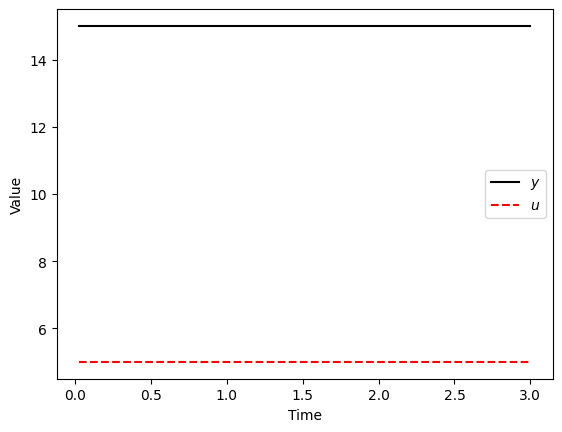

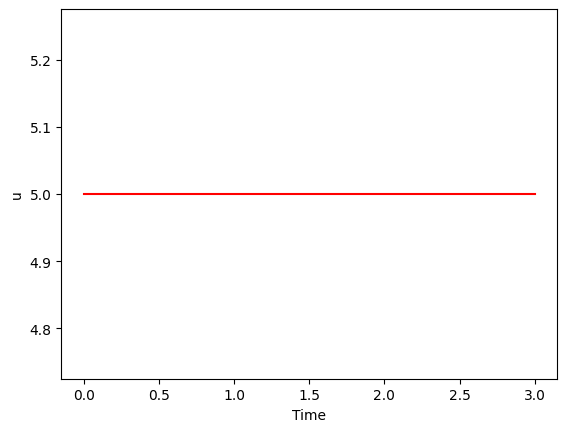

In [13]:
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:], u.value[1:], 'r--',label=r'$u$')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(m.time, u.value, 'r-')
plt.xlabel('Time')
plt.ylabel('u')
plt.show()

Проверим максимум

In [14]:
m = GEKKO(remote = False)
nt = 101
m.time = np.linspace(0, 3, nt)

y = m.Var(value = a1)
z = m.Var(value = 0)
u = m.Var(value = (-c1 + c2) / 2, lb = - c1, ub = c2)
t = m.Var(value = 0)
p = np.zeros(nt)   
p[-1] = 1.0
final = m.Param(value = p)

m.Equation(y.dt() == a3 * y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == b1 * y - b2 * u ** 2)
m.Maximize(z * final)    
m.options.IMODE = 6
m.solve(disp = False)

Exception: @error: Solution Not Found


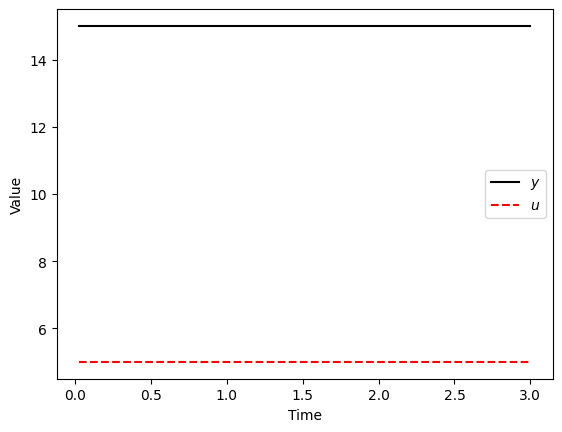

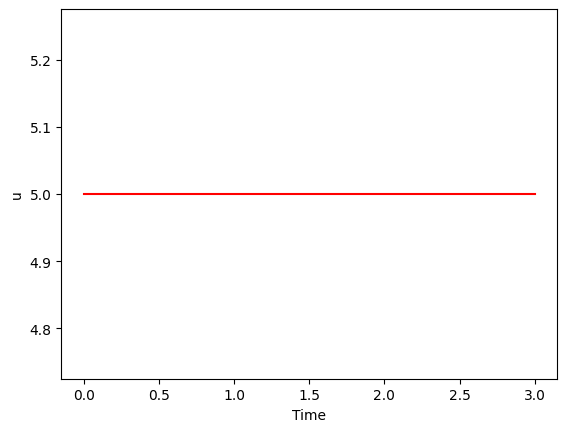

In [15]:
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:], u.value[1:], 'r--',label=r'$u$')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

plt.plot(m.time, u.value, 'r-')
plt.xlabel('Time')
plt.ylabel('u')
plt.show()

Исходя из графиков можно сделать вывод, что в этой задаче нет экстремумов

# Задача 8

Популяция осиного улья может быть описана следующими уравнениями:

\begin{equation*}
 \begin{cases}
  \dot{x}(t) = (\alpha u(t) - \beta)x(t), где x(0) = 1
  \\
  \dot{y}(t) = \gamma(1 - u(t))x(t), где y(0) = 0
  \\
 \end{cases}
\end{equation*}

Переменной $x$ обозначается число ос-рабочих, а $y$ – число королев. Константы $\alpha$, $\beta$, $\gamma$ – положительные действительные числа. $\alpha$, $\gamma$ – параметры окружающей среды, 𝛽 – коэффициент смертности ос-рабочих. Управление $u(t) \in [0,1]$ – доля улья, тратящая ресурсы
на увеличение числа королев.

Численно исследуйте траектории управления и траектории состояния для различных
параметров $\alpha$, $\beta$, $\gamma$ если задача улья состоит в максимизации числа ос-королев в последний момент времени (его можно выбрать любым, достаточно большим)

Инициализируем модель и задаем шкалу времени линейным разбиением

In [16]:
t_lim = (0, 1)
m = GEKKO(remote= False)
nt = 51
tm = np.linspace(t_lim[0],t_lim[1], nt)
m.time = tm

x = m.Var(value=1)
y = m.Var(value=0)

Инициализируем параметры модели и переменную управления

In [17]:
alpha_lim = (0,8)
beta_lim = (0,10)
gamma_lim = (0,6)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

alpha = m.FV(value=1.0, lb=alpha_lim[0], ub = alpha_lim[1])
alpha.STATUS = 1

beta = m.FV(value=1.0, lb=beta_lim[0], ub = beta_lim[1])
beta.STATUS = 1

gamma = m.FV(value=1.0, lb=gamma_lim[0], ub = gamma_lim[1])
gamma.STATUS = 1

u = m.MV(value=0, lb=0, ub=1)
u.STATUS = 1

Выпишем систему диффуров и зададим оптимизационную задачу максимизации конечного состояния количества ос-королев

In [18]:
m.Equation(x.dt() == (u * alpha-beta)*x)
m.Equation(y.dt() == gamma*(1-u)*x)
m.Obj(-y)
m.options.IMODE = 6
m.solve(disp=False)

Рисуем графики

Найденное alpha: 8.0
Найденное beta: 0.0
Найденное gamma: 6.0


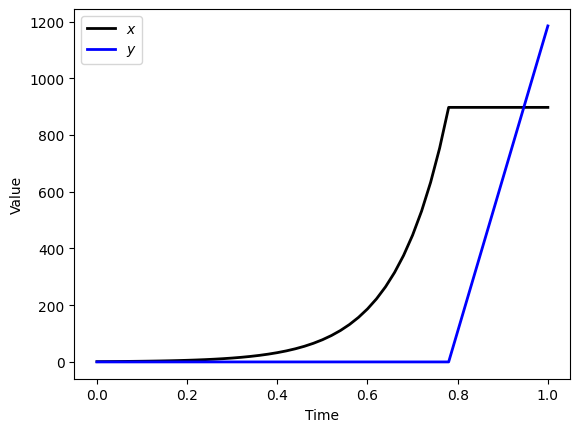

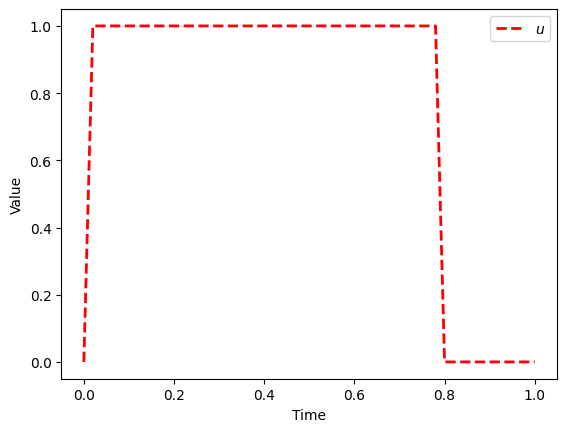

In [19]:

def plot_results(tm, x_val, y_val, u_val):
    plt.figure(1)
    plt.plot(tm, x_val, 'k-', linewidth=2, label=r'$x$')
    plt.plot(tm, y_val, 'b-', linewidth=2, label=r'$y$')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

    # Plot control variable
    plt.plot(tm, u_val, 'r--', linewidth=2, label=r'$u$')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

print(f'Найденное alpha: {alpha.value[0]}')
print(f'Найденное beta: {beta.value[0]}')
print(f'Найденное gamma: {gamma.value[0]}')

plot_results(tm, x.value, y.value, u.value)

# Задача 7

Численно решите следующую задачу оптимального управления:

$$\int_0^2 \frac{u^2}{2} - ty + ydt \to min$$
$$y(0) = 0,|u(t)|\leq\frac{3}{8}$$

при следующих уравнениях динамики 𝑦:

(a)  $y'(t) = u(t) - t$

(b) $y'(t) = u(t) + u^2(t) - t$

Инициализируем модель

In [20]:
m = GEKKO(remote = False)
nt = 201
m.time = np.linspace(0, 2, nt)

Определяем переменные

In [21]:
y = m.Var(value = 0)
z = m.Var(value = 0)
u = m.Var(value = 0, lb = - 3/8, ub = 3/8)
t = m.Var(value = 0)
p = np.zeros(nt)  
p[-1] = 1.0
final = m.Param(value = p)

Определим исходный функционал и заданные в условии соотношения

In [22]:
m.Equation(y.dt() == u - t)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == u ** 2 / 2 - t * y + y)
m.Obj(z * final)    
m.options.IMODE = 6 
m.solve(disp = False)

Рисуем графики

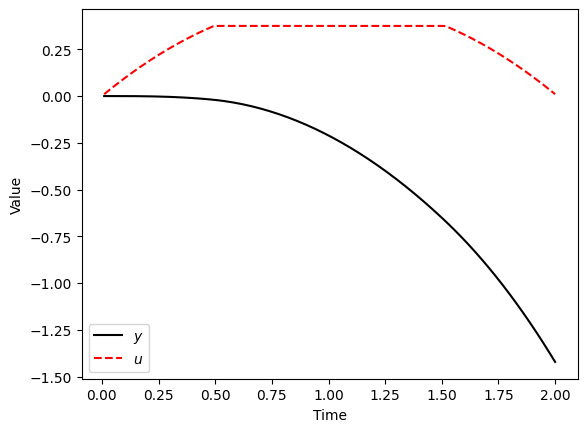

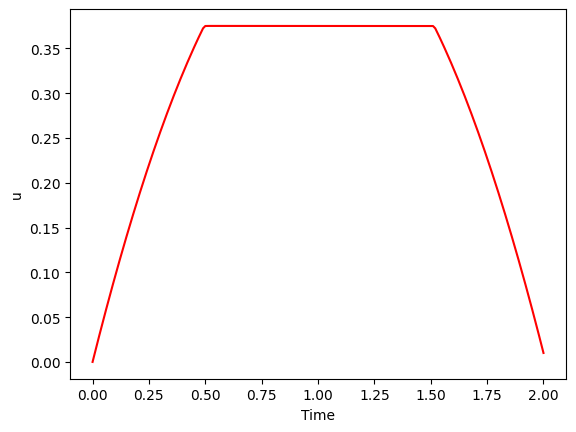

In [23]:
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:], u.value[1:], 'r--',label=r'$u$')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#график управления
plt.plot(m.time, u.value, 'r-')
plt.xlabel('Time')
plt.ylabel('u')
plt.show()

Значения функционала

In [24]:
y.value

[0.0, -1.4232327292e-12, -1.0000042614e-06, -4.0000085121e-06, -1.0000014178e-05, -2.0000021268e-05, -3.5000029796e-05, -5.600003978e-05, -8.4000051245e-05, -0.00012000006422, -0.00016500007875, -0.00022000009486, -0.00028600011261, -0.00036400013206, -0.00045500015326, -0.00056000017628, -0.00068000020121, -0.00081600022814, -0.00096900025716, -0.0011400002884, -0.001330000322, -0.001540000358, -0.0017710003966, -0.0020240004381, -0.0023000004826, -0.0026000005303, -0.0029250005815, -0.0032760006365, -0.0036540006956, -0.0040600007592, -0.0044950008277, -0.0049600009018, -0.0054560009819, -0.0059840010688, -0.0065450011634, -0.0071400012667, -0.00777000138, -0.0084360015049, -0.0091390016435, -0.0098800017982, -0.010660001973, -0.011480002171, -0.0123410024, -0.01324400267, -0.014190002994, -0.015180003396, -0.016215003923, -0.017296004675, -0.018424007726, -0.019600774707, -0.020851628582, -0.022201632536, -0.023651633248, -0.025201633729, -0.026851634086, -0.028601634363, -0.0304516

# (b) $y'(t) = u(t) + u^2(t) - t$

In [25]:
m = GEKKO(remote = False)
nt = 201
m.time = np.linspace(0, 2, nt)

In [26]:
y = m.Var(value = 0)
z = m.Var(value = 0)
u = m.Var(value = 0, lb = - 3/8, ub = 3/8) 
t = m.Var(value = 0)
p = np.zeros(nt)   
p[-1] = 1.0
final = m.Param(value = p)

In [27]:
m.Equation(y.dt() == u + u ** 2 - t)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == u ** 2 / 2 - t * y + y)
m.Obj(z * final)    
m.options.IMODE = 6 
m.solve(disp = False)

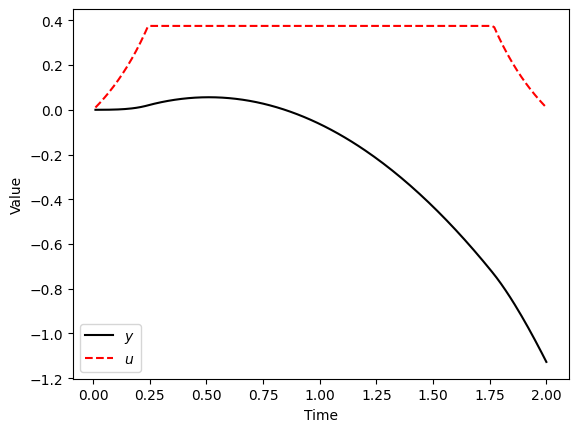

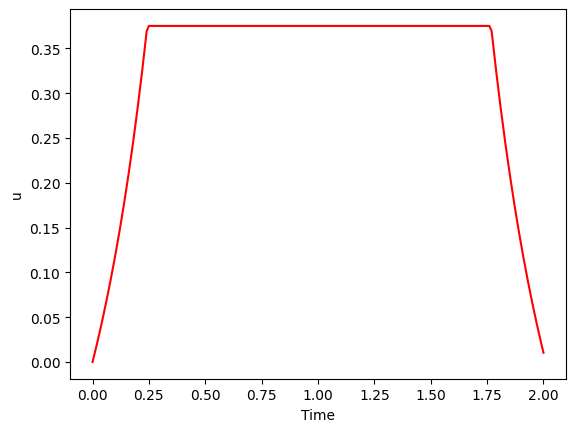

In [28]:
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:], u.value[1:], 'r--',label=r'$u$')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#график управления
plt.plot(m.time, u.value, 'r-')
plt.xlabel('Time')
plt.ylabel('u')
plt.show()

 Значения функционала

In [29]:
y.value

[0.0, 3.082047634e-06, 1.4625727982e-05, 4.0351802228e-05, 8.6347776344e-05, 0.00015909568824, 0.00026550233278, 0.00041293216852, 0.00060924317747, 0.00086282598001, 0.0011826465422, 0.0015782928517, 0.002060025983, 0.0026388360237, 0.0033265033892, 0.0041356661188, 0.00507989382, 0.0061737690112, 0.0074329767068, 0.0088744032012, 0.010516245129, 0.01237813002, 0.014481249721, 0.01684850816, 0.019504174259, 0.022160422654, 0.024716672073, 0.027172921762, 0.029529171579, 0.031785421469, 0.033941671408, 0.035997921379, 0.037954171376, 0.039810421392, 0.041566671424, 0.043222921467, 0.044779171521, 0.046235421584, 0.047591671654, 0.048847921731, 0.050004171813, 0.0510604219, 0.052016671992, 0.052872922087, 0.053629172186, 0.054285422287, 0.054841672392, 0.055297922499, 0.055654172609, 0.055910422721, 0.056066672835, 0.05612292295, 0.056079173067, 0.055935423186, 0.055691673306, 0.055347923428, 0.054904173551, 0.054360423675, 0.0537166738, 0.052972923926, 0.052129174053, 0.051185424181, 0

# Задача 6

Имеется динамическая система, характеризуемая координатой 𝑥 и соростью 𝑣. Параметром управления 𝑢 является ускорение системы, выбираемое из отрезка [−1, 1]. Требуется за минимальное время 𝑇 перевести систему из начального состояния $(x_0,v_0)$ в состояние (0, 0). Численно решите эту задачу оптимального управления, реализовав код для произ-
вольного вектора $(x_0,v_0)$.
Подсказка. $x' = v$ и $v' = u$. 

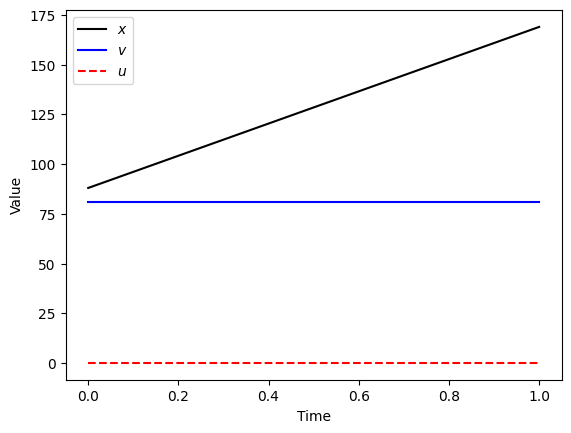

Начальные значения: x0=88, v0=81


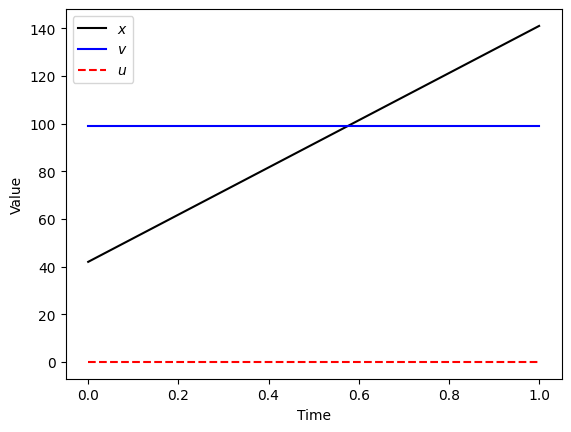

Начальные значения: x0=42, v0=99


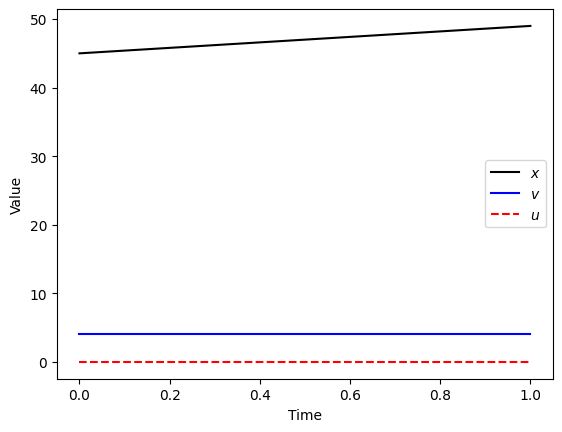

Начальные значения: x0=45, v0=4


In [30]:
def optimal_control(x0, v0, plot=True):
    # Инициализация модели
    m = GEKKO(remote=False)
    nt = 101
    tm = np.linspace(0, 1, nt)
    m.time = tm

    # Определяем переменные
    x = m.Var(value=x0)
    v = m.Var(value=v0)

    p = np.zeros(nt)
    p[-1] = 1.0
    final = m.Param(value=p)

    u = m.MV(value=0, lb=-1, ub=1)
    u.STATUS = 1

    # Уравнения системы
    m.Equation(x.dt() == v)
    m.Equation(v.dt() == u)
    
    # Минимизация времени
    m.Minimize(m.time[-1]) 

    m.options.IMODE = 6
    m.solve(disp=False)

    # Построение графиков
    if plot:
        plot_results(tm, x, v, u)
    
    print(f"Начальные значения: x0={x0}, v0={v0}")

def plot_results(tm, x, v, u):
    plt.plot(tm, x, 'k-', label=r'$x$')
    plt.plot(tm, v, 'b-', label=r'$v$')
    plt.plot(tm, u, 'r--', label=r'$u$')
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for _ in range(3):
    x0 = np.random.randint(0, 101)  
    v0 = np.random.randint(0, 101)  
    optimal_control(x0, v0)